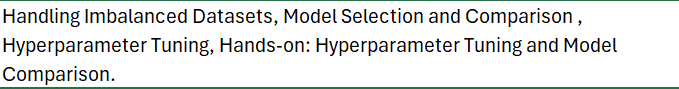

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install imbalanced-learn

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.linear_model import LogisticRegression

In [7]:
X,y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.85,0.15],
    n_informative=2,
    n_redundant=0,
    n_features=2,
    n_samples=100,
    random_state=42
)

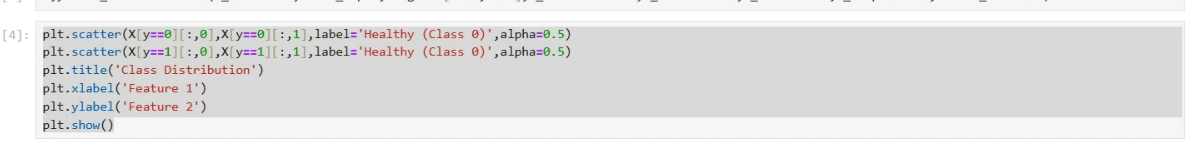

In [20]:
X[:5], y[:5]

(array([[-0.44057357,  3.38869353],
        [-1.96116097, -2.02508291],
        [-2.5598485 , -2.92487377],
        [-3.2813861 ,  0.8631441 ],
        [ 2.56070438, -1.42795824]]),
 array([0, 0, 0, 0, 1]))

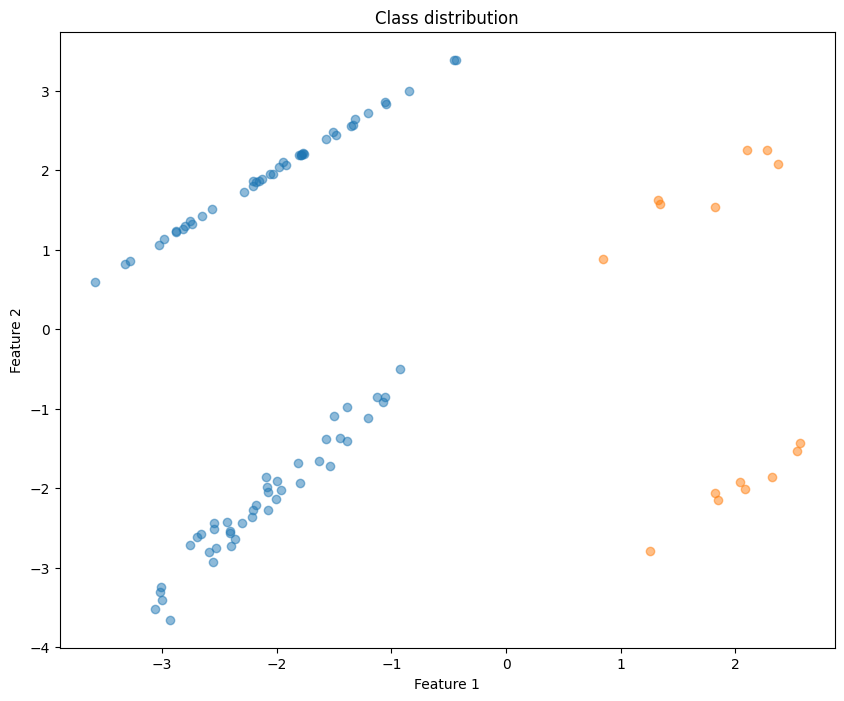

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.5)
plt.scatter(X[y==1][:,0], X[y==1][:,1], alpha=0.5)
plt.title("Class distribution")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
confusion_matrix(y_test,y_pred)

array([[26,  0],
       [ 0,  4]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
ros = RandomOverSampler(random_state=42)
X_sample, y_sample = ros.fit_resample(X_train, y_train)

In [21]:
y_train, y_sample

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]))

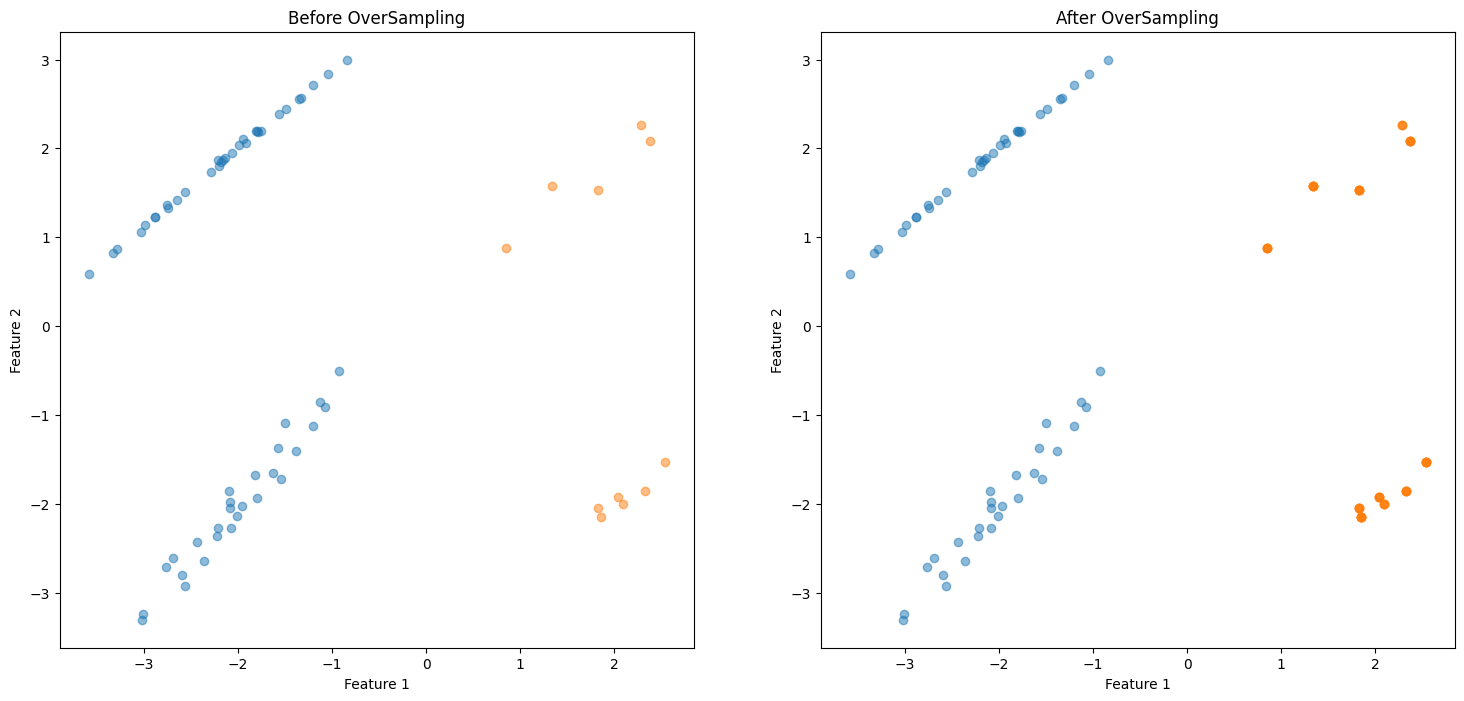

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,8)

ax1.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], alpha=0.5)
ax1.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], alpha=0.5)
ax1.set_title("Before OverSampling")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax2.scatter(X_sample[y_sample == 0][:, 0], X_sample[y_sample == 0][:, 1], alpha=0.5)
ax2.scatter(X_sample[y_sample == 1][:, 0], X_sample[y_sample == 1][:, 1], alpha=0.5)
ax2.set_title("After OverSampling")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")

plt.show()

`We can observe that the minority class datapoints have darkened after oversampling which means they are being replicated.`

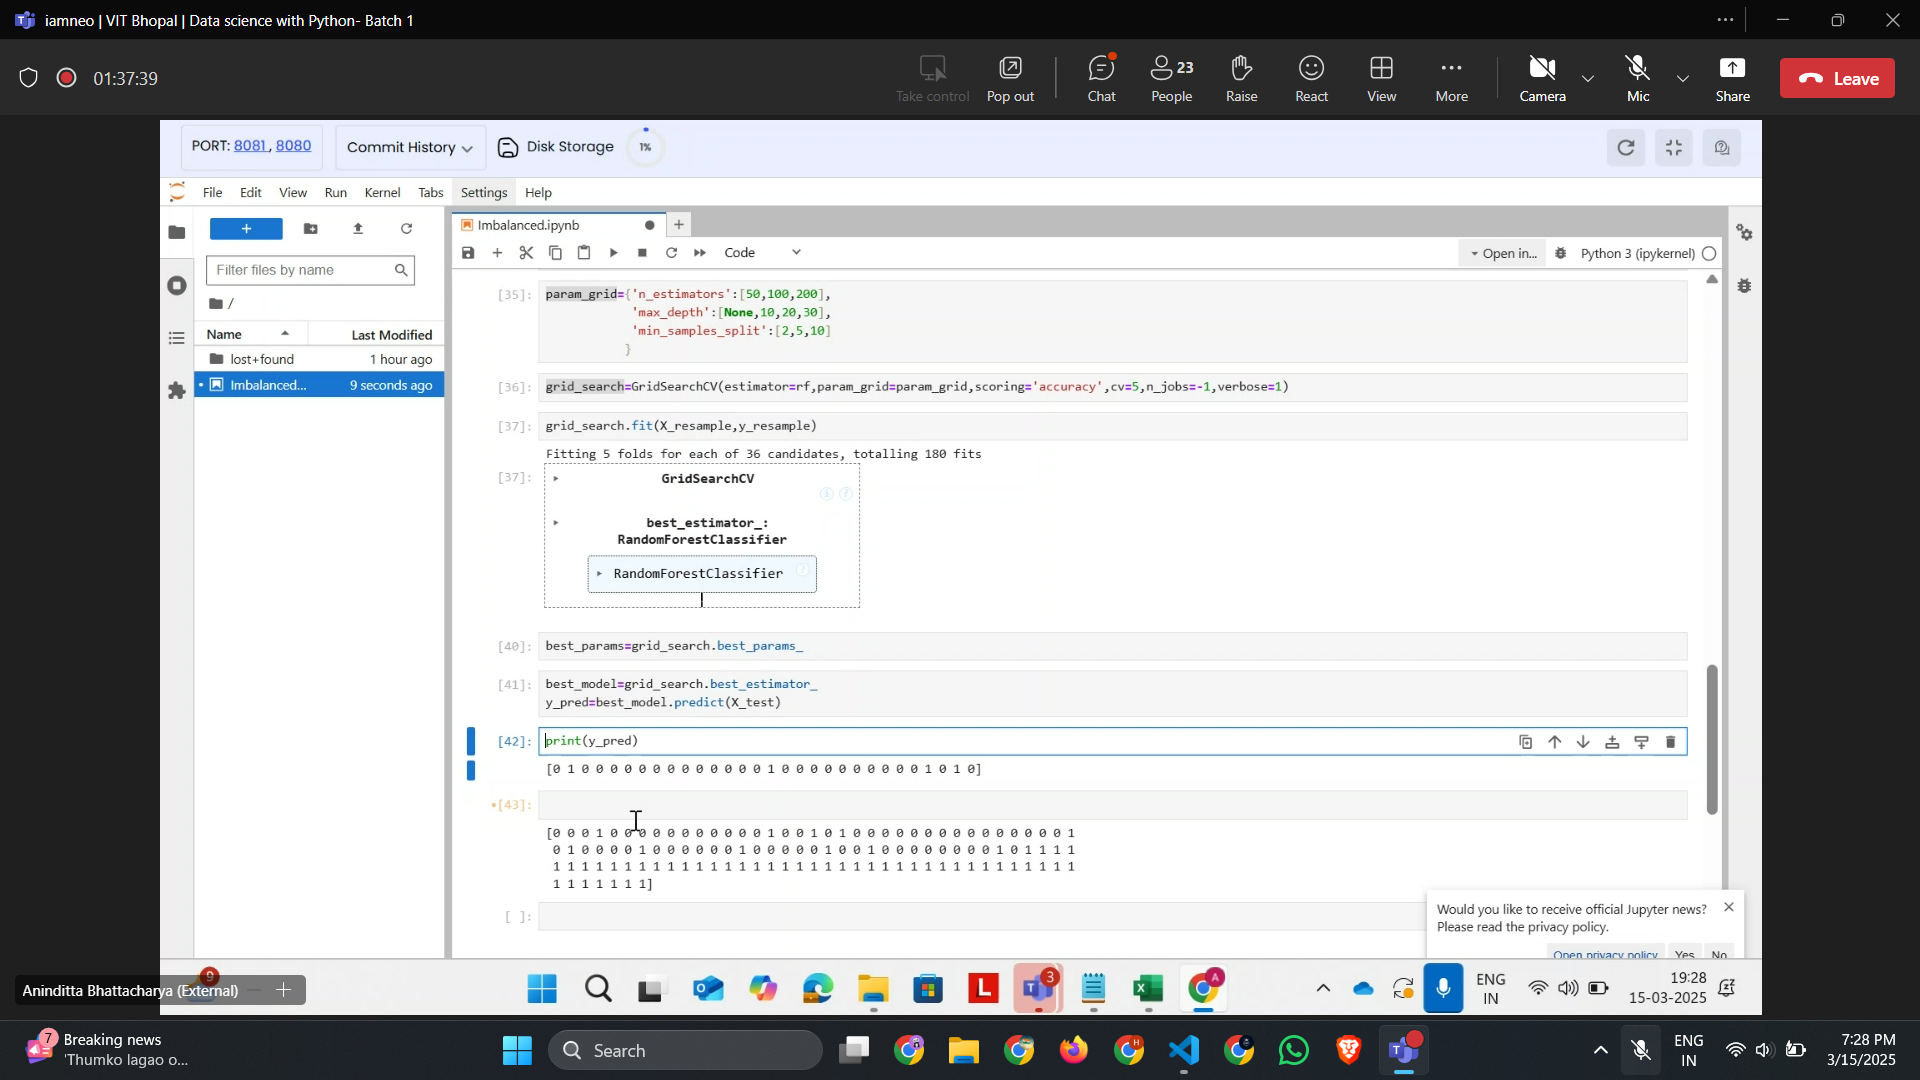